In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc,f1_score,auc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Charger les données
file_path = 'final_Data.csv'
data = pd.read_csv('final_Data.csv')


In [ ]:
data

,Production,Vente,diff,stock,perte,pourcent_fuite,fuite
0,9 846,12450,-2 604,-2 931,45,"0,5",non
1,10417,9338,1079,862,217,"2,1",oui
2,9449,9583,-134,-524,234,"2,5",oui
3,10183,9549,634,482,34,"0,3",non
4,10140,8663,1477,1 201,45,"0,4",non
...,...,...,...,...,...,...,...
1002,8756,11898,-3142,-3 484,342,"3,9",oui
1003,9797,9843,-46,-262,23,"0,2",non
1004,7998,2610,5388,5 218,170,"2,1",oui
1005,11163,7589,3574,3 426,567,"5,1",oui


In [ ]:
# Nettoyage des données : suppression des espaces et des caractères spéciaux
data_cleaned = data.copy()
columns_to_clean = ['Production', 'diff', 'stock', 'pourcent_fuite']
for col in columns_to_clean:
    data_cleaned[col] = data_cleaned[col].str.replace(r'[^\d\.-]', '', regex=True).astype(float)


In [ ]:
# Encodage des valeurs 'oui' et 'non' dans la colonne cible
data_cleaned['fuite'] = data_cleaned['fuite'].map({'oui': 1, 'non': 0})


In [ ]:
# Séparation des variables explicatives (X) et cible (y)
X = data_cleaned.drop(columns=['fuite'])
y = data_cleaned['fuite']



In [ ]:





# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




In [ ]:
# Vérifier la taille après la séparation
print(f"Taille X_train : {X_train.shape}")
print(f"Taille y_train : {y_train.shape}")
print(f"Taille X_test : {X_test.shape}")
print(f"Taille y_test : {y_test.shape}")



Taille X_train : (704, 6)
Taille y_train : (704,)
Taille X_test : (303, 6)
Taille y_test : (303,)


In [ ]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Entraînement du modèle SVM avec un noyau RBF
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(C=1, random_state=42)

In [ ]:
# Prédictions et évaluation
# Prédictions et évaluation
y_pred_svm = svm_model.predict(X_test_scaled)




In [ ]:
# Précision et rapport de classification
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Précision du modèle SVM : {accuracy_svm * 100:.2f} %")
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred_svm))

Précision du modèle SVM : 99.01 %

Rapport de classification :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.99      0.99      0.99       150

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg       0.99      0.99      0.99       303



In [ ]:
# Calcul du F1-Score
f1 = f1_score(y_test, y_pred_svm)
print(f"F1-Score : {f1:.2f}")





F1-Score : 0.99


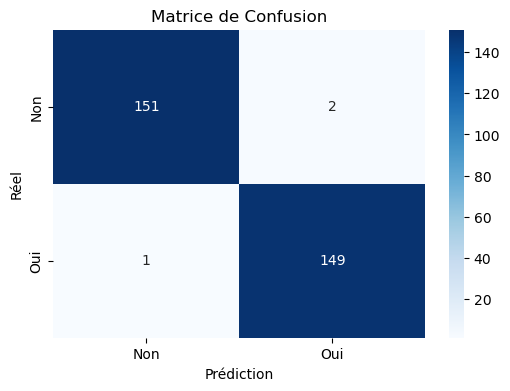

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.title("Matrice de Confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()


In [ ]:
# Courbes ROC et AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)


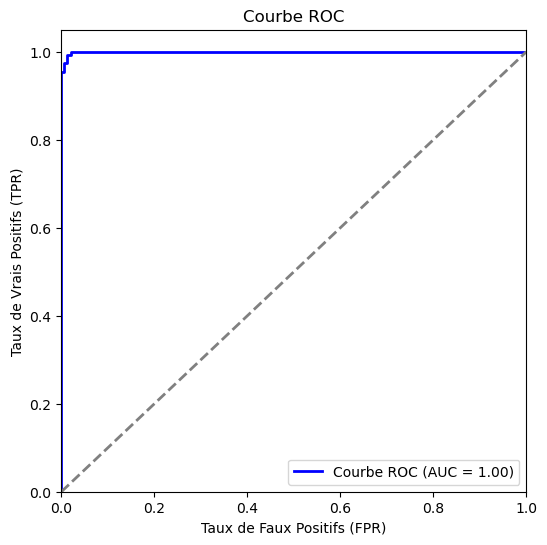

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

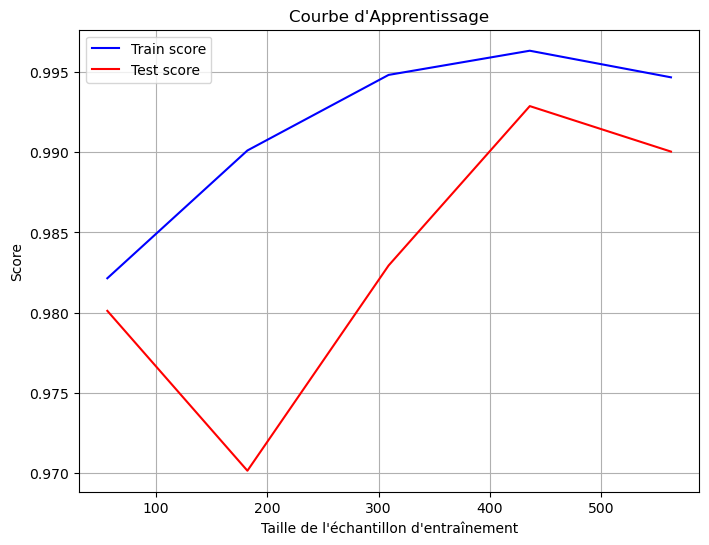

In [ ]:
#afficher courbe d'apprentissage

train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train_scaled, y_train, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score", color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score", color='red')
plt.title("Courbe d'Apprentissage")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()